In [6]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv("marketing_AB.csv")

In [8]:
df.head(10)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14
5,5,1137664,ad,False,734,Saturday,10
6,6,1116205,ad,False,264,Wednesday,13
7,7,1496843,ad,False,17,Sunday,18
8,8,1448851,ad,False,21,Tuesday,19
9,9,1446284,ad,False,142,Monday,14


In [13]:
df = df.drop(["Unnamed: 0", "user id"], axis=1)

In [14]:
print(df.columns)

Index(['test group', 'converted', 'total ads', 'most ads day',
       'most ads hour'],
      dtype='object')


In [15]:
df.shape

(588101, 5)

In [24]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total ads,588101.0,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
most ads hour,588101.0,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   test group     588101 non-null  object
 1   converted      588101 non-null  bool  
 2   total ads      588101 non-null  int64 
 3   most ads day   588101 non-null  object
 4   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [21]:
df.isna().sum()

test group       0
converted        0
total ads        0
most ads day     0
most ads hour    0
dtype: int64

In [27]:
print("Test Group: ", df["test group"].unique())
print("converted: ", df["converted"].unique())
print("most ads day: ", df["most ads day"].unique())

Test Group:  ['ad' 'psa']
converted:  [False  True]
most ads day:  ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']


In [29]:
df["converted"] = df["converted"].astype(int)
df

,test group,converted,total ads,most ads day,most ads hour
0,ad,0,130,Monday,20
1,ad,0,93,Tuesday,22
2,ad,0,21,Tuesday,18
3,ad,0,355,Tuesday,10
4,ad,0,276,Friday,14
...,...,...,...,...,...
588096,ad,0,1,Tuesday,23
588097,ad,0,1,Tuesday,23
588098,ad,0,3,Tuesday,23
588099,ad,0,1,Tuesday,23


In [36]:
control_group = df[df["test group"] == "psa"]
test_group = df[df["test group"] == "ad"]

t_stat, p_val = stats.ttest_ind(test_group['converted'], control_group['converted'])
print(f"Test Group Analysis - T-statistic: {t_stat}, P-value: {p_val}")

Test Group Analysis - T-statistic: 7.37040597428566, P-value: 1.7033052627831264e-13


In [37]:
if p_val < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in conversion rates between the 'ad' and 'psa' groups.")

Reject the null hypothesis: There is a significant difference in conversion rates between the 'ad' and 'psa' groups.


In [38]:
# Most Ads Day Analysis
anova_result_day = stats.f_oneway(
    df[df['most ads day'] == 'Monday']['converted'],
    df[df['most ads day'] == 'Tuesday']['converted'],
    df[df['most ads day'] == 'Wednesday']['converted'],
    df[df['most ads day'] == 'Thursday']['converted'],
    df[df['most ads day'] == 'Friday']['converted'],
    df[df['most ads day'] == 'Saturday']['converted'],
    df[df['most ads day'] == 'Sunday']['converted']
)
print(f"Most Ads Day Analysis - F-statistic: {anova_result_day.statistic}, P-value: {anova_result_day.pvalue}")

Most Ads Day Analysis - F-statistic: 68.38818386898062, P-value: 1.8032007655359558e-85


In [39]:
if anova_result_day.pvalue < 0.05:
    print("Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.")
else:
    print("Fail to reject the null hypothesis: The day with the most ads seen does not significantly affect conversion rates.")

Reject the null hypothesis: The day with the most ads seen significantly affects the conversion rate.


In [40]:
# Most Ads Hour Analysis
anova_result_hour = stats.f_oneway(
    df[df['most ads hour'] == 0]['converted'],
    df[df['most ads hour'] == 1]['converted'],
    df[df['most ads hour'] == 2]['converted'],
    df[df['most ads hour'] == 3]['converted'],
    df[df['most ads hour'] == 4]['converted'],
    df[df['most ads hour'] == 5]['converted'],
    df[df['most ads hour'] == 6]['converted'],
    df[df['most ads hour'] == 7]['converted'],
    df[df['most ads hour'] == 8]['converted'],
    df[df['most ads hour'] == 9]['converted'],
    df[df['most ads hour'] == 10]['converted'],
    df[df['most ads hour'] == 11]['converted'],
    df[df['most ads hour'] == 12]['converted'],
    df[df['most ads hour'] == 13]['converted'],
    df[df['most ads hour'] == 14]['converted'],
    df[df['most ads hour'] == 15]['converted'],
    df[df['most ads hour'] == 16]['converted'],
    df[df['most ads hour'] == 17]['converted'],
    df[df['most ads hour'] == 18]['converted'],
    df[df['most ads hour'] == 19]['converted'],
    df[df['most ads hour'] == 20]['converted'],
    df[df['most ads hour'] == 21]['converted'],
    df[df['most ads hour'] == 22]['converted'],
    df[df['most ads hour'] == 23]['converted']
)
print(f"Most Ads Hour Analysis - F-statistic: {anova_result_hour.statistic}, P-value: {anova_result_hour.pvalue}")

Most Ads Hour Analysis - F-statistic: 18.742037312974496, P-value: 7.482025334833055e-77


In [41]:
# Total Ads Analysis
df_subset = df[df['total ads'] < 50].copy()

#create bins for total_ads
# Create bins for total_ads using .loc
df_subset.loc[:, 'total_ads_bin'] = pd.cut(df_subset['total ads'], bins=[-1, 1, 5, 10, 20, 30, 40, 50], labels=['0-1', '2-5', '6-10', '11-20', '21-30', '31-40', '41-50'])

#perform ANOVA on binned data
anova_result_bin = stats.f_oneway(
    df_subset[df_subset['total_ads_bin'] == '0-1']['converted'],
    df_subset[df_subset['total_ads_bin'] == '2-5']['converted'],
    df_subset[df_subset['total_ads_bin'] == '6-10']['converted'],
    df_subset[df_subset['total_ads_bin'] == '11-20']['converted'],
    df_subset[df_subset['total_ads_bin'] == '21-30']['converted'],
    df_subset[df_subset['total_ads_bin'] == '31-40']['converted'],
    df_subset[df_subset['total_ads_bin'] == '41-50']['converted']
)

print(f"Total Ads (Binned) Analysis - F-statistic: {anova_result_bin.statistic}, P-value: {anova_result_bin.pvalue}")

Total Ads (Binned) Analysis - F-statistic: 1245.6689124986833, P-value: 0.0


In [42]:
if anova_result_bin.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).")
else:
    print("Fail to reject the null hypothesis: The number of ads seen (binned) does not significantly affect conversion rates.")

Reject the null hypothesis: There is a significant difference in conversion rates among different levels of total ads seen (binned).


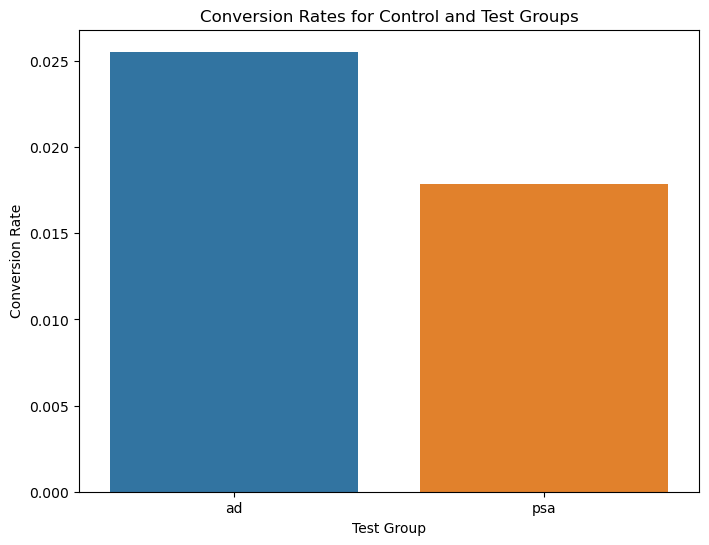

In [43]:
#conversion Rates for Test Group
conversion_rates = df.groupby('test group')['converted'].mean().reset_index()
conversion_rates.columns = ['Test Group', 'Conversion Rate']
plt.figure(figsize=(8, 6))
sns.barplot(x='Test Group', y='Conversion Rate', data=conversion_rates)
plt.title('Conversion Rates for Control and Test Groups')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

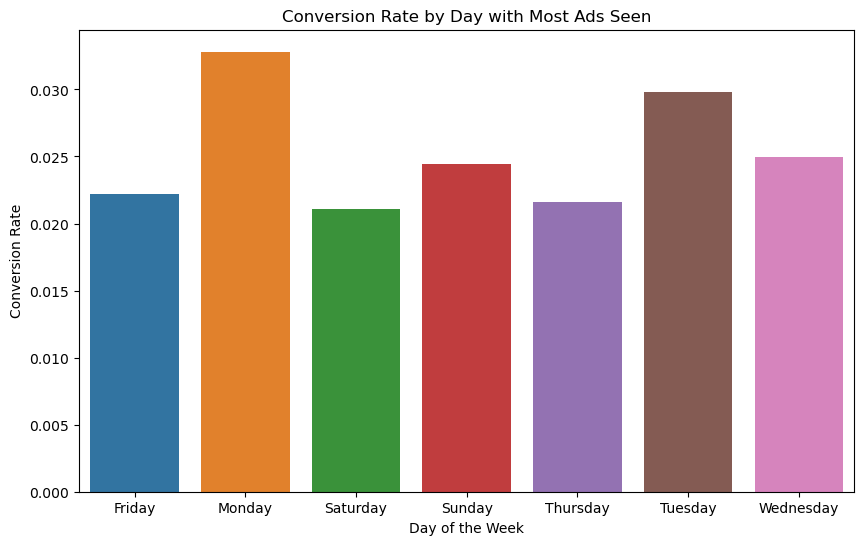

In [44]:
#conversion Rate by Most Ads Day
day_conversion_rate = df.groupby('most ads day')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=day_conversion_rate, x='most ads day', y='converted')
plt.title('Conversion Rate by Day with Most Ads Seen')
plt.xlabel('Day of the Week')
plt.ylabel('Conversion Rate')
plt.show()


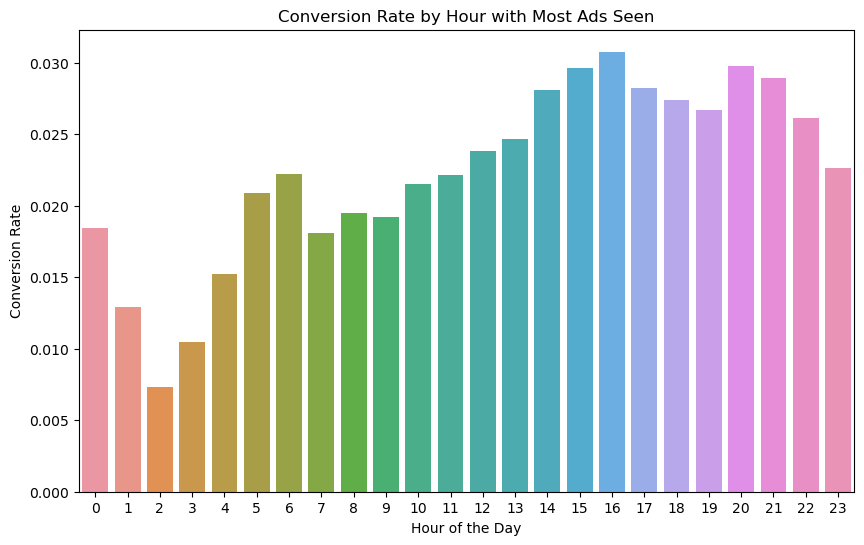

In [45]:
#conversion Rate by Most Ads Hour
hour_conversion_rate = df.groupby('most ads hour')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_conversion_rate, x='most ads hour', y='converted')
plt.title('Conversion Rate by Hour with Most Ads Seen')
plt.xlabel('Hour of the Day')
plt.ylabel('Conversion Rate')
plt.show()

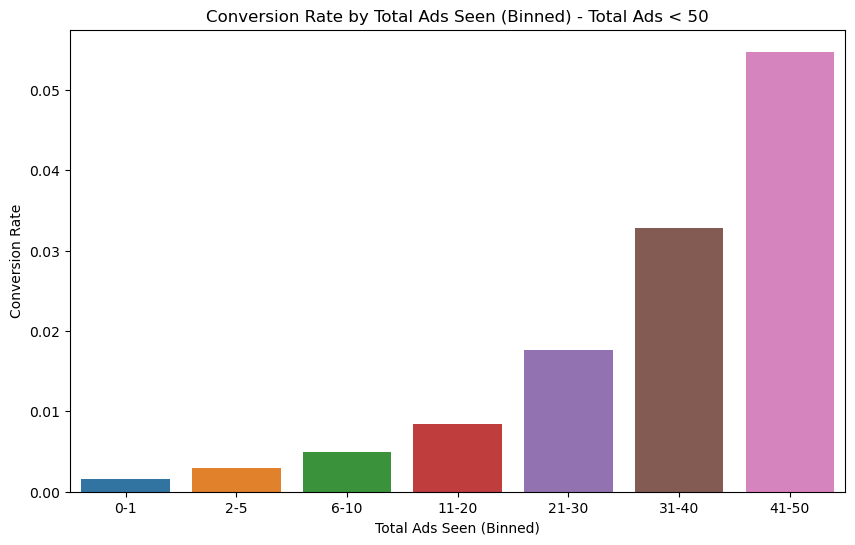

In [46]:
#conversion Rate by Total Ads
ads_conversion_rate_bin = df_subset.groupby('total_ads_bin')['converted'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=ads_conversion_rate_bin, x='total_ads_bin', y='converted')
plt.title('Conversion Rate by Total Ads Seen (Binned) - Total Ads < 50')
plt.xlabel('Total Ads Seen (Binned)')
plt.ylabel('Conversion Rate')
plt.show()